In [37]:
import os
import cv2
import tqdm
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
INT_S2_DIR = os.path.join("_intermediate", "stage2_plantdoc")
DATASET_DIR = os.path.join("_data", "plantdoc_csv")

In [3]:
train_data = pd.read_csv(os.path.join(DATASET_DIR, "data.csv"))

In [4]:
with open(os.path.join(INT_S2_DIR, "total.pkl"), "rb") as f:
    results = pickle.load(f)

/tmp/ipykernel_1142938/3654069281.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  results = pickle.load(f)


In [48]:
next(iter(results.values())).keys()

dict_keys([1042, 1376, 1293, 2728, 435, 1528, 2482, 1628, 1065, 792, 145, 1419, 945, 1143, 607, 804, 2711, 1267, 1592, 2491, 2412, 655, 314, 1809, 2903, 2160, 198, 1646, 1519, 349, 700, 620, 146, 2888, 2326, 937, 2693, 1311, 1854, 1289, 515, 1297, 2613, 2632, 333, 2056, 1489, 2168, 1190, 1372, 1301, 1920, 329, 463, 2383, 1057, 256, 2247, 892, 836, 1382, 1892, 1731, 570, 993, 1483, 2760, 2094, 2811, 2715, 2313, 1240, 313, 1118, 2767, 2586, 1348, 2505, 250, 1062, 159, 1236, 671, 2379, 1202, 2713, 2343, 1104, 322, 1031, 2790, 53, 2304, 794, 1512, 2395, 705, 418, 1441, 2342, 2286, 2205, 2798, 1692, 2658, 1718, 2807, 2887, 211, 2486, 1106, 693, 2185, 403, 861, 2575, 1030, 2043, 2197, 1014, 299, 976, 1522, 1748, 1989, 2676, 1486, 2061, 1593, 927, 1002, 206, 719, 1992, 1550, 2266, 2637, 2302, 221, 2082, 1595, 1970, 173, 538, 1477, 2909, 668, 1055, 1462, 1589, 1153, 176, 343, 667, 55, 1732, 440, 1130, 622, 642, 497, 2111, 2655, 734, 934, 1799, 212, 2716, 1397, 1604, 2838, 2208, 1969, 2186, 256

In [5]:
INDEX = next(iter(next(iter(results.values())).keys()))
INDEX

1042

In [49]:
INDEX = 390

In [51]:
image_id = train_data.iloc[INDEX]['image_id']
image_file_name = f"{image_id}.jpg"
image_file = os.path.join(DATASET_DIR, "images", image_file_name)
train_data.iloc[INDEX]

image_id                       image_390
healthy                            False
file_name    train_Corn_Gray_leaf_spot_6
Name: 390, dtype: object

In [7]:
print(results.keys())

dict_keys(['(SAM + YOLOv8) + (InceptionV3)', '(SAM + ResNet) + (InceptionV3)', '(SAM + YOLOv8) + (VGG19)', '(SAM + ResNet) + (VGG19)', '(SAM + YOLOv8) + (AlexNet)', '(SAM + ResNet) + (AlexNet)', '(SAM + YOLOv8) + (ResNet152V2)', '(SAM + ResNet) + (ResNet152V2)'])


(SAM + YOLOv8) + (InceptionV3): 100%|██████████| 16/16 [00:00<00:00, 202.56it/s]
(SAM + ResNet) + (InceptionV3): 0it [00:00, ?it/s]
(SAM + YOLOv8) + (VGG19): 100%|██████████| 16/16 [00:00<00:00, 191.15it/s]
(SAM + ResNet) + (VGG19): 0it [00:00, ?it/s]
(SAM + YOLOv8) + (AlexNet): 100%|██████████| 16/16 [00:00<00:00, 140.86it/s]
(SAM + ResNet) + (AlexNet): 0it [00:00, ?it/s]
(SAM + YOLOv8) + (ResNet152V2): 100%|██████████| 16/16 [00:00<00:00, 198.64it/s]


0.8317776918411255
0.9212192893028259
0.964259684085846
0.946876049041748
0.9465184807777405
0.9046621918678284
0.9579713344573975
0.8735825419425964
0.962142288684845
0.9017577767372131
0.8651140928268433
0.9085947871208191
0.9307647943496704
0.8880533576011658
0.8822171092033386
0.9370126128196716


(SAM + ResNet) + (ResNet152V2): 0it [00:00, ?it/s]


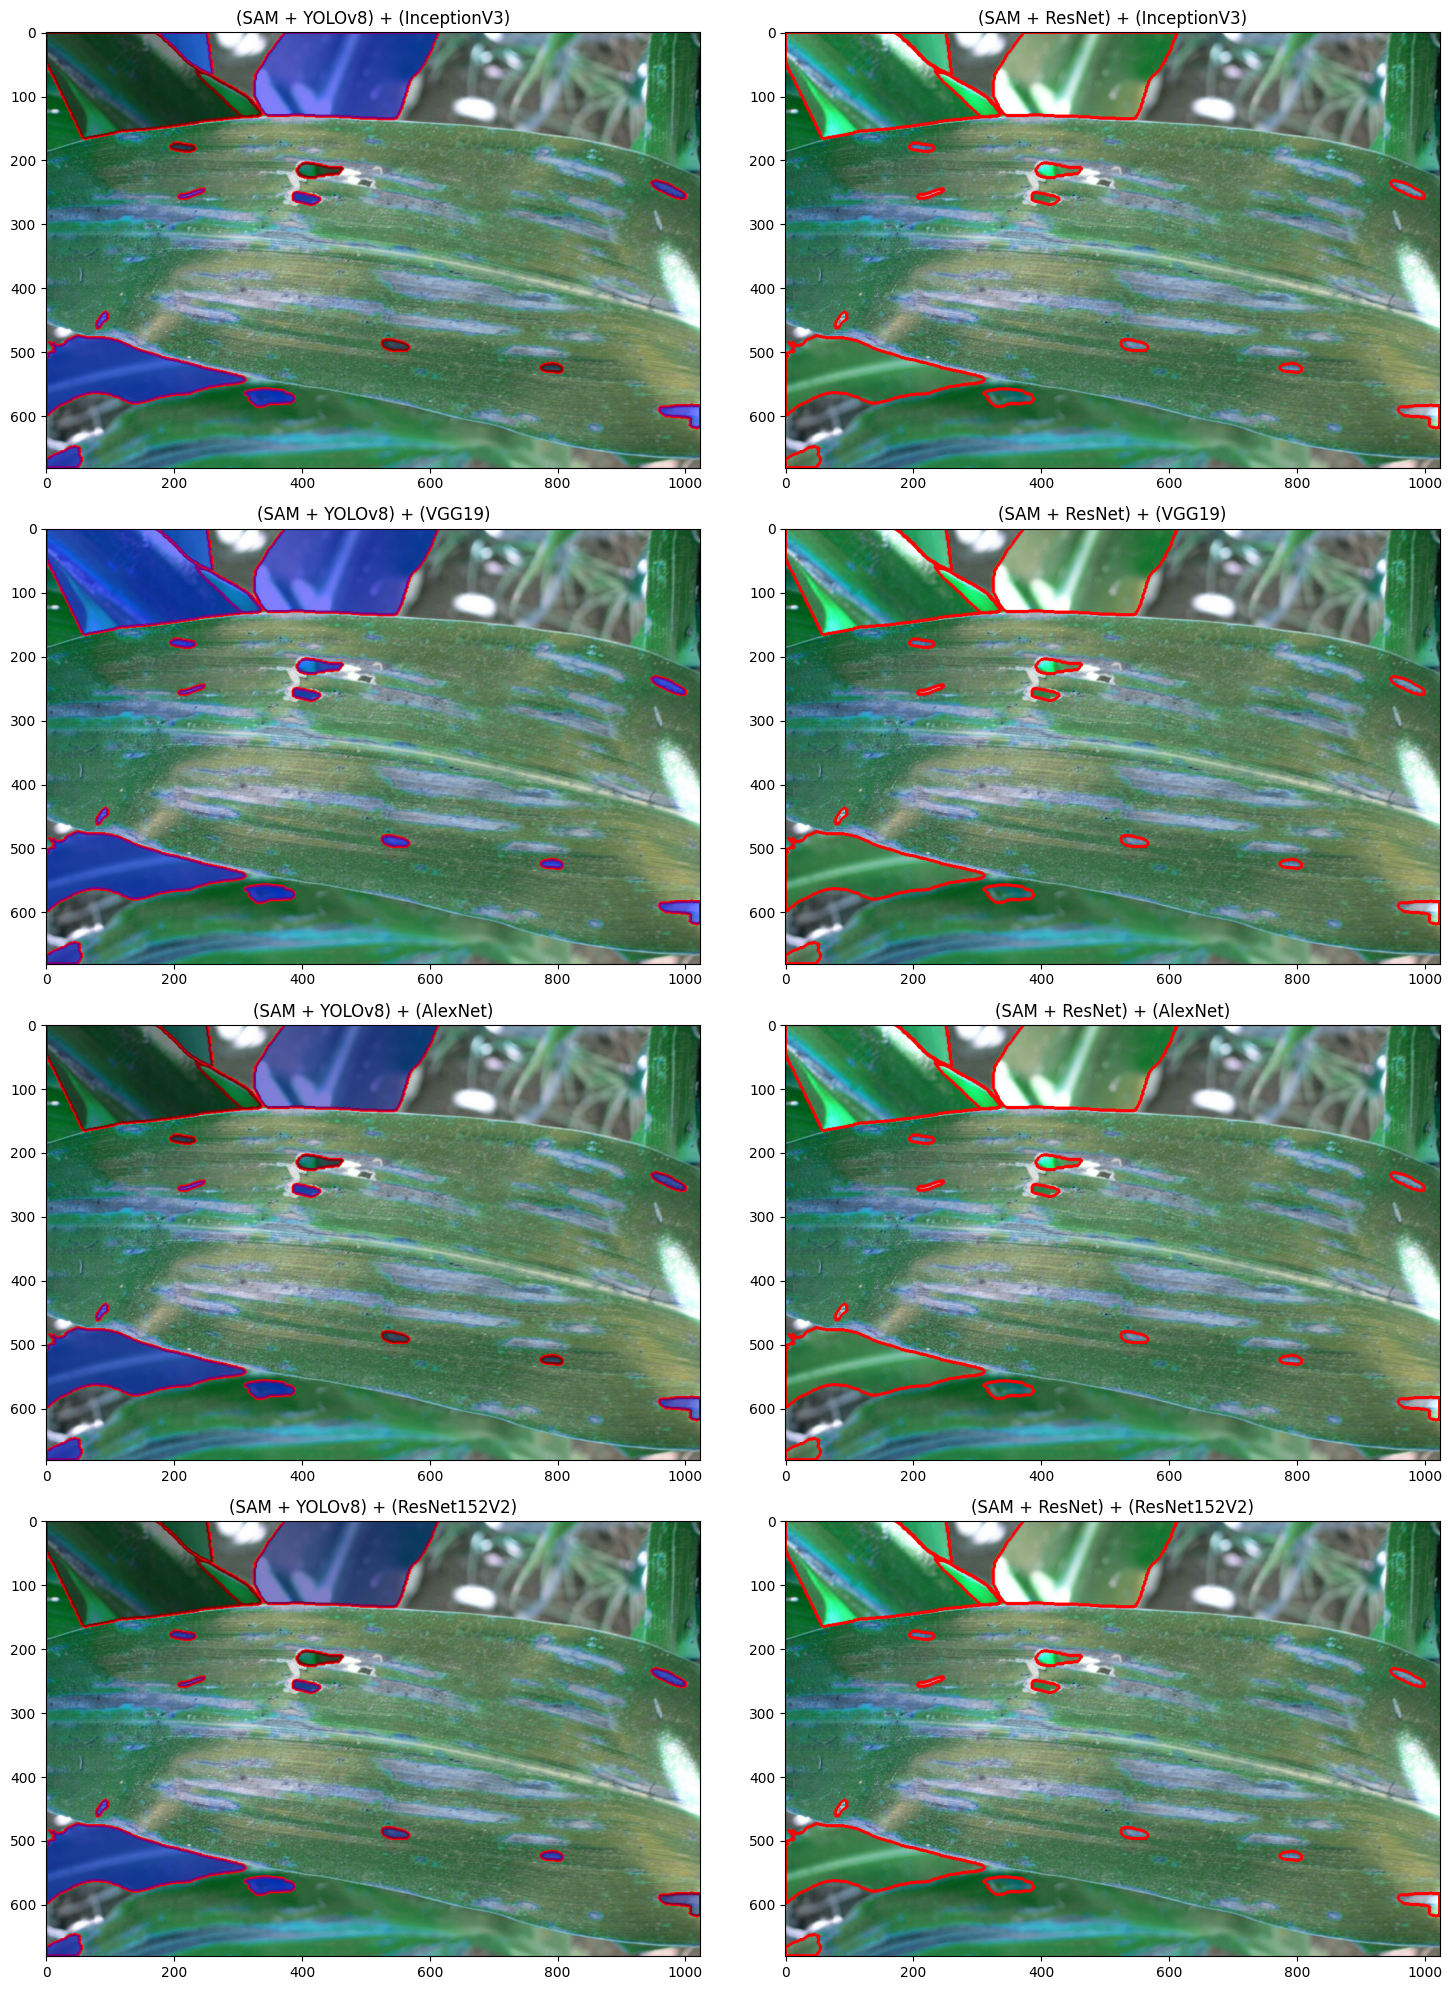

In [53]:
ALPHA = 0.5

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

image = cv2.imread(image_file)

for ax, (name, data) in zip(axes, results.items()):
    data = data[INDEX]
    
    # Initialize alpha and color masks
    alpha_mask = np.zeros(image.shape[:2], dtype=np.float32)
    color_mask = np.zeros_like(image, dtype=np.float32)
    
    for mask in tqdm.tqdm(data['masks'], desc=name):
        # Resize segmentation mask to match image dimensions
        seg = cv2.resize(mask['segmentation'].astype(np.uint8), (image.shape[1], image.shape[0]))
        
        # Find contours and draw them directly on the original image
        contours, _ = cv2.findContours(seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(image, contours, -1, (255, 0, 0), 4)
        
        if "ResNet" in name:
            print(mask['leaf_probability'])
        # Add to color mask and alpha mask
        prob_color = mask['prob_diseased'] * 255
        color_mask[seg > 0] = [0, 0, prob_color]
        alpha_mask[seg > 0] = ALPHA

    # Create a 3D alpha mask for blending
    alpha_mask_3d = alpha_mask[:, :, np.newaxis]
    
    # Blend the color mask with the original image
    blended_image = ((alpha_mask_3d * color_mask) + ((1 - alpha_mask_3d) * image)).astype(np.uint8)
    
    # Display the blended image
    ax.imshow(blended_image)
    ax.set_title(name)

fig.tight_layout()
plt.show()